In [1]:
"""
Here we compare the visual results obtained by our model and by the model of liu and lam.
First we show the results obtained by the models trained for denoising,
and then those obtained when we train the models for the deconvolution problem.
"""

# PACKAGES
import os

# Math and data
import math
import numpy as np
import h5py
import random
import pandas as pd
#import scipy

# Image processing and plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib import colors
import cv2

# Astropy
from astropy.io import fits
from astropy.visualization import astropy_mpl_style

# Machine learning
import sklearn as sk
from skimage.metrics import structural_similarity as ssim

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Add
from tensorflow.python.framework import ops
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Model

# Local functions
from TFMPackage import architectures_V2
from TFMPackage import train_utils
from TFMPackage import plot_utils
from astropy.visualization import astropy_mpl_style
from sklearn.model_selection import train_test_split

# Denoising

In [2]:
# NOISE LEVEL SELECTION
noise_level = "6"

In [3]:
# DATA LOADING
current_dir=os.getcwd()
hdul_X = fits.open(current_dir + "\\data\\final\\multi_PSF_Noise_L" + noise_level + ".fits")
hdul_Y = fits.open(current_dir + "\\data\\final\\multi_PSF_noNoise.fits")

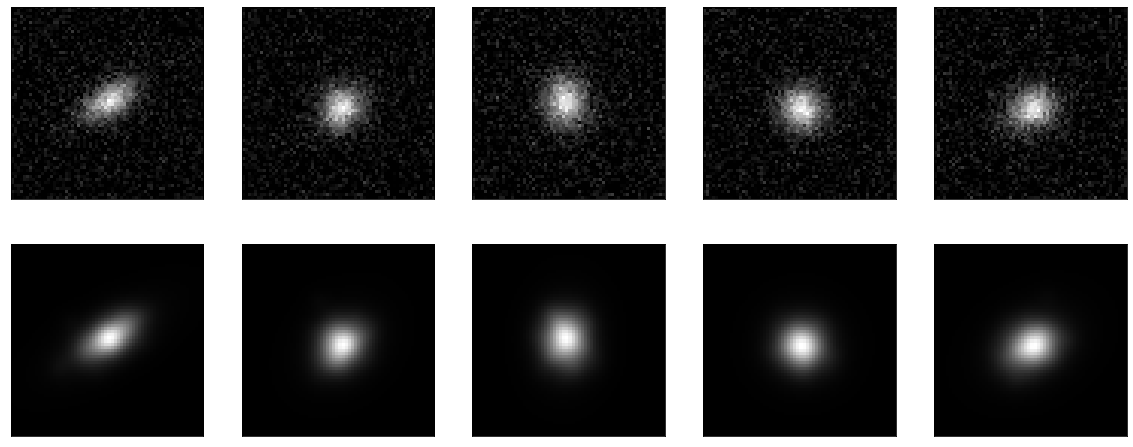

In [4]:
# DATA PREPROCESSING

# Convert to Array and remove the last row and column of the image
X = np.array([hdul_X[i].data[0:-1, 0:-1].clip(0.) for i in range(len(hdul_X))]) 
y = np.array([hdul_Y[i].data[0:-1, 0:-1] for i in range(len(hdul_Y))])

# Normalization
maxim = np.max([X,y])
X = train_utils.preprocess(X, dim=1, max_value = maxim)
y = train_utils.preprocess(y, dim=1, max_value = maxim)

# Split in 70% training 20% validation and 10% test
X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.10)
X_train, X_val, y_train, y_val = train_test_split(X_pretrain, y_pretrain, test_size=0.22)

# Model input shape
input_shape = (64, 64, 1)

# Some examples of training samples with and without noise
plot_utils.display(X_train, y_train, n = 5)

In [5]:
# TRAINED MODEL LOADING 

current_dir=os.getcwd()
train_folder_name = "train_12282022" # <------------ Write the name of the folder with your trained models here!!!
save_dir = current_dir + "\\" + train_folder_name + "\\poisson\\level_6" 

model_original = keras.models.load_model(save_dir + "\\model_original.h5")
model_final = keras.models.load_model(save_dir + "\\model_final.h5")

In [6]:
# OBTAINING PREDICTIONS
predictions_liu = model_original.predict(X_test)
predictions_own = model_final.predict(X_test)

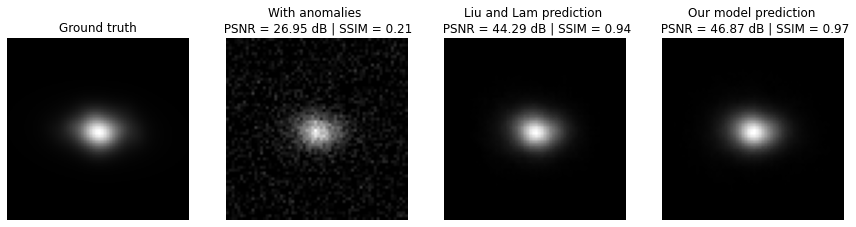

In [7]:
# RESULTS COMPARISON
plot_utils.results_comparison(X_test, y_test, maxim, predictions_liu, predictions_own)

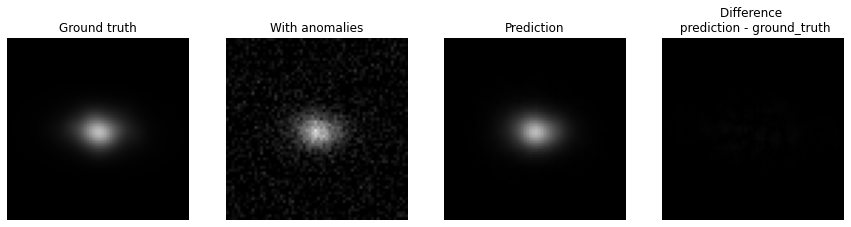

In [8]:
# IMAGE DIFFERENCE
plot_utils.results_difference(X_test, y_test, maxim, predictions_own)

In [9]:
# SAVING .FITS (Delete or rename existing folder before creating new one on the same date)
plot_utils.get_fits(X_test, y_test, maxim, predictions_liu, predictions_own, PSF = False)

# PSF

In [10]:
# NOISE LEVEL SELECTION
noise_level = "6"

In [11]:
# DATA LOADING
current_dir=os.getcwd()
hdul_X = fits.open(current_dir + "\\data\\final\\multi_PSF_Noise_L" + noise_level + ".fits")
hdul_Y = fits.open(current_dir + "\\data\\final\\multi_noPSF_noNoise.fits")

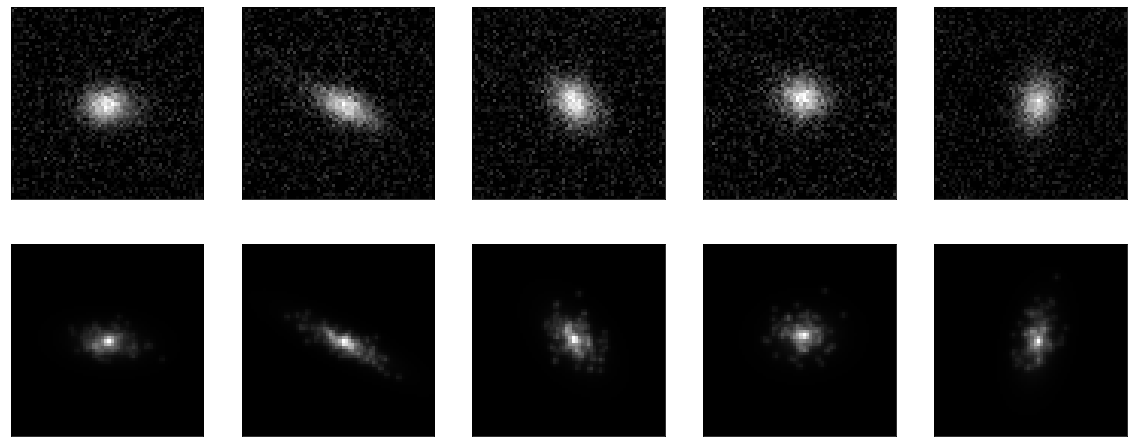

In [12]:
# DATA PREPROCESSING

# Convert to Array and remove the last row and column of the image
X = np.array([hdul_X[i].data[0:-1, 0:-1].clip(0.) for i in range(len(hdul_X))]) 
y = np.array([hdul_Y[i].data[0:-1, 0:-1] for i in range(len(hdul_Y))])

# Normalization
maxim = np.max([X,y])
X = train_utils.preprocess(X, dim=1, max_value = maxim)
y = train_utils.preprocess(y, dim=1, max_value = maxim)

# Split in 70% training 20% validation and 10% test
X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.10)
X_train, X_val, y_train, y_val = train_test_split(X_pretrain, y_pretrain, test_size=0.22)

# Model input shape
input_shape = (64, 64, 1)

# Some examples of training samples with and without noise
plot_utils.display(X_train, y_train, n = 5)

In [13]:
# TRAINED MODEL LOADING

current_dir=os.getcwd()
train_folder_name = "train_12282022" # <------------ Write the name of the folder with your trained models here!!!
save_dir = current_dir + "\\" + train_folder_name + "\\poisson\\level_6"

model_original = keras.models.load_model(save_dir + "\\model_original.h5")
model_final = keras.models.load_model(save_dir + "\\model_final.h5")

In [14]:
# RESULTS COMPARISON
predictions_liu = model_original.predict(X_test)
predictions_own = model_final.predict(X_test)

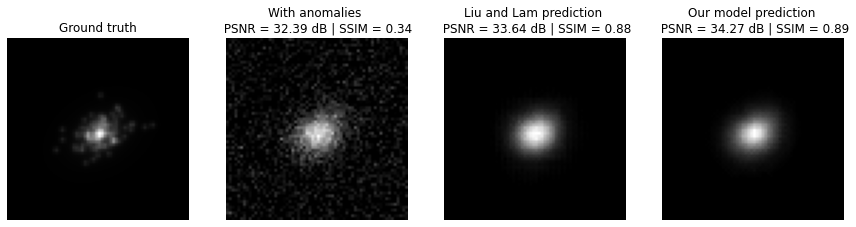

In [15]:
# RESULTS COMPARISON
plot_utils.results_comparison(X_test, y_test, maxim, predictions_liu, predictions_own, index = 100)

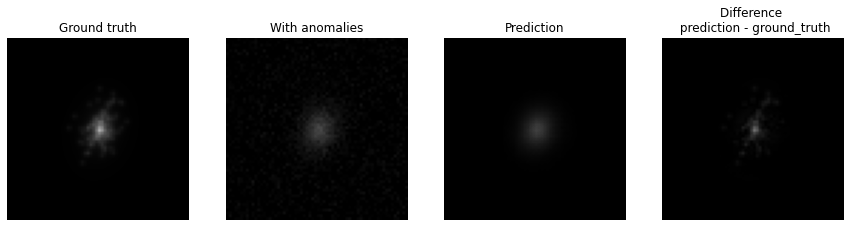

In [16]:
# IMAGE DIFFERENCE
plot_utils.results_difference(X_test, y_test, maxim, predictions_own)

In [17]:
# SAVING .FITS (Delete or rename existing folder before creating new one on the same date)
plot_utils.get_fits(X_test, y_test, maxim, predictions_liu, predictions_own, PSF = True)